In [1]:
import numpy as np

In [2]:
class LinearRegression(object):
    def __init__(self, lr= 0.01, n_iter= 1000):
        self.lr= lr
        self.n_iter= n_iter
        self.weights= None
        self.bias= None

    def fit(self, X, y):
        n_sample, n_feature= X.shape
        X= np.array(X)
        self.weights= np.random.rand(n_feature)
        self.bias= 0

        for _ in range(self.n_iter):
            y_predicted= np.dot(X, self.weights)
            self.weights-= (self.lr/ n_sample)*(X.T).dot(y_predicted- y)
            self.bias-= (self.lr/ n_sample)*np.sum(y_predicted- y)

    def predict(self, X):
        return np.dot(X, self.weights)+ self.bias

In [3]:
#Testing the code
from sklearn.model_selection import train_test_split
from sklearn import datasets
from matplotlib import pyplot as plt

In [4]:
X, y= datasets.make_regression(n_samples= 100, noise= 20, n_features= 1, random_state= 42)
X_train, X_test, y_train, y_test= train_test_split(X, y, random_state= 42, test_size= 0.2)

In [5]:
print('Shape of the dataset:', X.shape)

Shape of the dataset: (100, 1)


In [6]:
lreg= LinearRegression()
lreg.fit(X_train, y_train)

In [7]:
y_predict= lreg.predict(X_test)

In [8]:
from sklearn.metrics import mean_squared_error
msq= mean_squared_error
train_pred= lreg.predict(X_train)
test_pred= lreg.predict(X_test)

train_error= msq(y_train, train_pred)
test_error= msq(y_test, test_pred)

print('average train error is:', msq(y_train, train_pred)/ len(X_train))
print("average test error is:", test_error/ len(X_test))

average train error is: 4.015464243838997
average test error is: 28.01298551859096


In [9]:
train_min_index= np.argmin(X_train)
train_max_index= np.argmax(X_train)

train_min_X= X_train[train_min_index]
train_max_X= X_train[train_max_index]
train_min_y= train_pred[train_min_index]
train_max_y= train_pred[train_max_index]


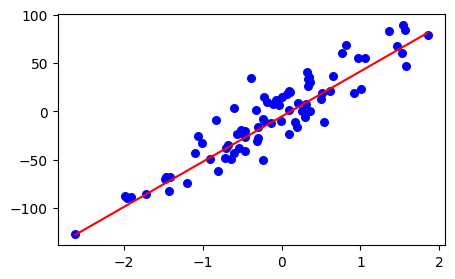

In [10]:
fig= plt.figure(figsize= (5, 3))
plt.scatter(X_train, y_train, color= 'b', marker= 'o', s= 30)
plt.plot((train_min_X, train_max_X), (train_min_y, train_max_y), color= 'r')